# 1. PRE-PROCESSING


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

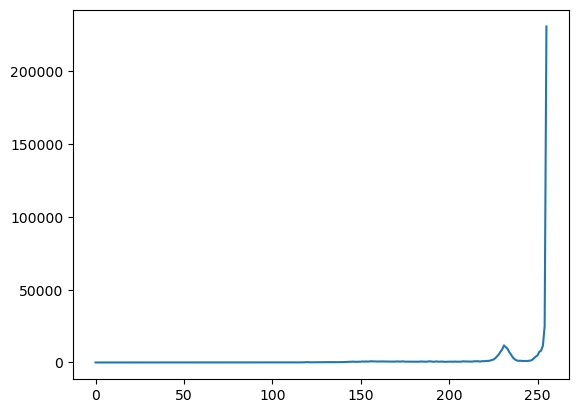

In [6]:
# Read image
img = cv2.imread(r"/Users/namanchhaparia/Desktop/_/MPSTME/SEM4/SIP/SIP_Project/timetable.png")
hh, ww = img.shape[:2]

histg = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histg)
plt.show()

## 1.A) THRESHOLDING

In [7]:
#Thresholding on white
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)


In our image, white is the background and black is the foreground. So initially, we segmented the image to create a binary image. The pixel values of white are close to 255 and black are close to 0. Therefore wherever, the pixel values is less than 200, we've set it to 0 and wherever it is greater than 200 we've set it to 255. This allows us to work easily on our image.

## 1.B) MORPHOLOGY (DILATION, EROSION, INVERSION)

### Dilation	
The value of the output pixel is the maximum value of all pixels in the neighborhood. In a binary image, a pixel is set to 1 if any of the neighboring pixels have the value 1. Morphological dilation makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger.

### Erosion 
The value of the output pixel is the minimum value of all pixels in the neighborhood. In a binary image, a pixel is set to 0 if any of the neighboring pixels have the value 0. Morphological erosion removes floating pixels and thin lines so that only substantive objects remain. Remaining lines appear thinner and shapes appear smaller.

### Closing
Perform morphological closing. The closing operation dilates an image and then erodes the dilated image, using the same structuring element for both operations.
Morphological closing is useful for filling small holes in an image while preserving the shape and size of large holes and objects in the image.



In [8]:
# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)


True

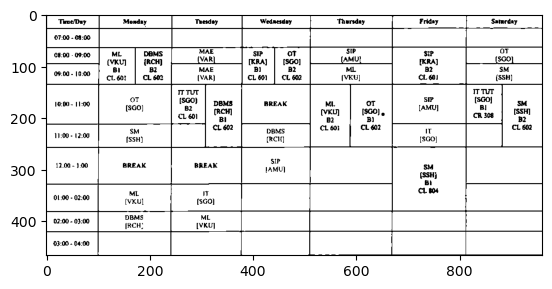

In [14]:
# save results
plt.imshow(thresh,cmap='gray')
cv2.imwrite("Masked_TT.png", thresh)


# 2) EDGE-DETECTION

In [15]:
image_path = '/Users/namanchhaparia/Desktop/_/MPSTME/SEM4/SIP/SIP_Project/Masked_TT.png'


In [16]:
def find_rectangles(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to identify rectangles
    rectangles = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

    # Draw rectangles on the original image for visualization
    for rect in rectangles:
        x, y, w, h = cv2.boundingRect(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles
    cv2.imwrite('Edge_Detected.png', image)
    plt.imshow(image)

    # Return the number of rectangles
    return len(rectangles)



Number of rectangles: 70


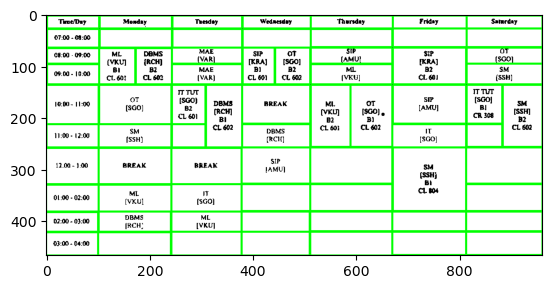

In [17]:
# Example usage
image_path = '/Users/namanchhaparia/Desktop/_/MPSTME/SEM4/SIP/SIP_Project/Masked_TT.png'
num_rectangles = find_rectangles(image_path)
print(f'Number of rectangles: {num_rectangles}')

# 3) TEXT EXTRACTION

In [19]:
#Extracting the text using ExtractTable module

from ExtractTable import ExtractTable
et_sess = ExtractTable(api_key='cu1BGunaBrv6bEHvjI4nHfWa0S2MUFDG4tN1f3Es')        # Using an API
print(et_sess.check_usage())        # Checks the API Key validity as well as shows associated plan usage 
table_data = et_sess.process_file(filepath='/Users/namanchhaparia/Desktop/_/MPSTME/SEM4/SIP/SIP_Project/Edge_Detected.png', output_format="df")

{'credits': 10, 'queued': 0, 'used': 2}


In [20]:
#Saving the data into a csv file

et_sess.save_output("/Users/namanchhaparia/Desktop/_/MPSTME/SEM4/SIP/SIP_Project", output_format="csv")

'/Users/namanchhaparia/Desktop/_/MPSTME/SEM4/SIP/SIP_Project'